Importando bibliotecas necessárias

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

Lendo os dados e guardando em variáveis

In [2]:
#Dados gerais
data = pd.read_csv(r"C:\Users\mathe\Desktop\Music Recommendation System using Spotify Dataset\data.csv")

#Dados dos gêneros
genre_data = pd.read_csv(r"C:\Users\mathe\Desktop\Music Recommendation System using Spotify Dataset\data_by_genres.csv")

#Dados dos anos
year_data = pd.read_csv(r"C:\Users\mathe\Desktop\Music Recommendation System using Spotify Dataset\data_by_year.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

Identificando as correlações entre Popularity (feature de análise) e as demais variáveis

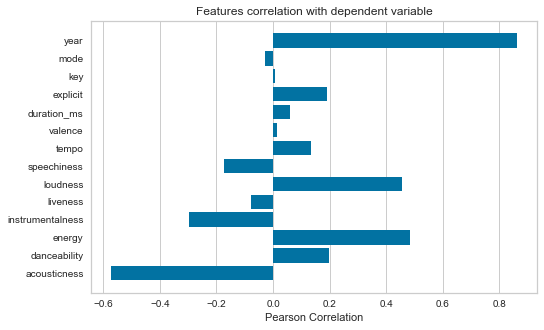

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [9]:
# Importando módulo Feature Correlation (Correlação de Pearson) para identificar qual correlação possui a variável Popularity em comparação com as demais variáveis.

from yellowbrick.target import FeatureCorrelation

# Armazenando demais variáveis
feature_names= ['acousticness', 'danceability', 'energy', 'instrumentalness',   
                'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms',
                'explicit','key','mode','year']

# Setando Popularity e demais variáveis para os eixos do gráfico
X,y = data[feature_names], data['popularity']

# Criando um lista das variáveis para inserir no visualizer
features = np.array(feature_names)

# Criando o Visualizer
visualizer = FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']= (8,5)
visualizer.fit(X, y)        # Fitando os dados dentro do visualizer
visualizer.show()           # Plotando o gráfico

### Entendendo os dados através de visualizações e análises exploratórias